# Wine Quality Project

### Index
1.  [Exploratory Data Analysis](#1)<br>
2.  [Feature Selection](#2)<br>
3.  [Feature Verification and Hypothesis Testing](#3)<br>
4.  [Scaling & Train-Test Split](#4)<br>
5.  [Model 1: Logistic Regression](#5)<br>
6.  [Model 2: k-Nearest Neighbors](#6)<br>
7.  [Model 3: Decision Trees](#7)<br>
8.  [Model 4: Random Forests](#8)<br>
9.  [Model 5: Gradient Boosting ](#9)<br>
10. [Model Evaluation and Selection](#10)<br>
11. [Hyperparameter Tuning](#11)<br>
12. [Class balancing](#12)<br>
12. [Cross-validation](#12)<br>
12. [Final Results](#12)<br>

# 1: Exploratory Data Analysis<a id="1"></a>

### load and discover data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

from scipy.stats import f_oneway, kruskal
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df_white = pd.read_csv('winequality-white.csv', sep=';', header=0).copy()
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
df_white.shape

(4898, 12)

In [4]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# Rename columns

df_white.rename(columns={
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide'
}, inplace=True)

In [7]:
df_white.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df_white.duplicated().sum()

937

In [9]:
# view duplicates 

duplicates = df_white.duplicated()

df_filtered = df_white[duplicates]
df_filtered

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [10]:
df_white = df_white.drop_duplicates().reset_index(drop=True)

In [11]:
df_white.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,3961.0,6.839346,0.866860,3.80000,6.30000,6.8000,7.30000,14.20000
volatile_acidity,3961.0,0.280538,0.103437,0.08000,0.21000,0.2600,0.33000,1.10000
citric_acid,3961.0,0.334332,0.122446,0.00000,0.27000,0.3200,0.39000,1.66000
residual_sugar,3961.0,5.914819,4.861646,0.60000,1.60000,4.7000,8.90000,65.80000
chlorides,3961.0,0.045905,0.023103,0.00900,0.03500,0.0420,0.05000,0.34600
free_sulfur_dioxide,3961.0,34.889169,17.210021,2.00000,23.00000,33.0000,45.00000,289.00000
total_sulfur_dioxide,3961.0,137.193512,43.129065,9.00000,106.00000,133.0000,166.00000,440.00000
density,3961.0,0.993790,0.002905,0.98711,0.99162,0.9935,0.99571,1.03898
pH,3961.0,3.195458,0.151546,2.72000,3.09000,3.1800,3.29000,3.82000
sulphates,3961.0,0.490351,0.113523,0.22000,0.41000,0.4800,0.55000,1.08000


In [12]:
df_white['quality'].value_counts()

quality
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: count, dtype: int64

## check outliers and data distribution

In [13]:
# List of features

features = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 
    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 
    'pH', 'sulphates', 'alcohol', 'quality'
]

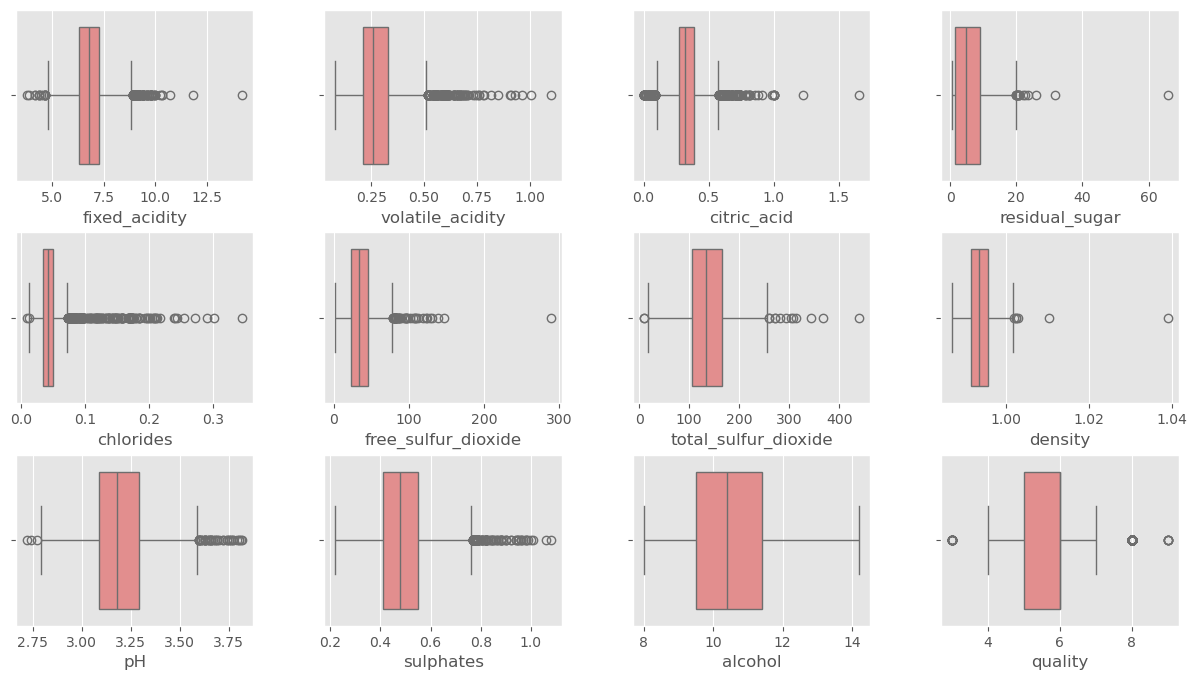

In [14]:
# Create boxplots for each feature

plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 columns, plot by index
    sns.boxplot(x=df_white[feature], color='lightcoral')
    
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

* The dataset includes samples that have been rated by wine experts, so we aim to retain as many rows as possible.
* However, some features have extreme outliers, which can negatively impact the performance of the model.
* we will not touch outliers on this step since we will review them in detail after feature selection. 

# 2: Feature Selection<a id="2"></a>

* In this step, we will create a new feature called quality_label to categorize the quality rankings of wine (from 3 to 9) into three groups: low, medium, and high. The breakdown will be as follows:

    Scores of 3, 4, and 5 will be labeled as 0 (low quality).
    Scores of 6 and 7 will be labeled as 1 (medium quality).
    Scores of 8 and 9 will be labeled as 2 (high quality).

* This categorization will help improve the model's performance by simplifying the target variable.

In [15]:
# Create a 'quality_label' column to categorize wine quality

df_white['quality_label'] = df_white['quality'].apply(lambda x: 0 if x in [3, 4, 5] else (1 if x in [6, 7] else 2))

In [16]:
df_white['quality'].value_counts()

quality
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: count, dtype: int64

In [17]:
df_white['quality_label'].value_counts()

quality_label
1    2477
0    1348
2     136
Name: count, dtype: int64

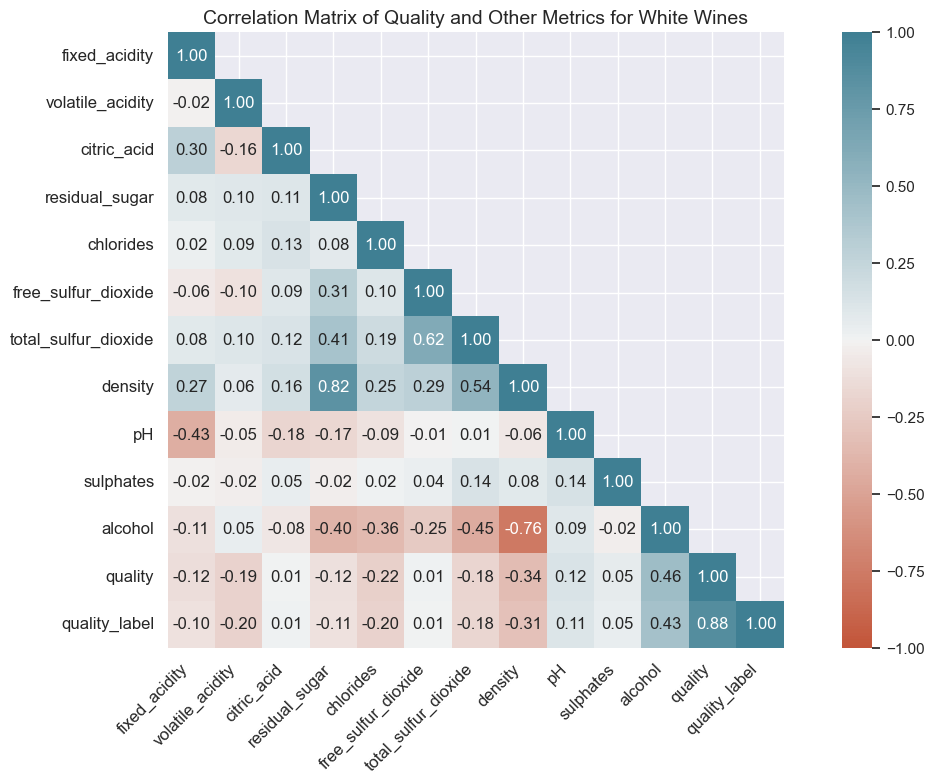

In [18]:
# create a heatmap to check relation between quality and other features

# Compute the correlation matrix

corr = df_white.corr(numeric_only=True)

# Create a mask for the upper triangle

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set the figure size and plot the heatmap with the mask

sns.set_theme(rc={'figure.figsize': (15, 8)})
ax = sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap=sns.diverging_palette(20, 220, n=200), square=True)

# Customize the tick labels and title

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation Matrix of Quality and Other Metrics for White Wines', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

* The features showing the highest correlation with wine quality label are:
    * alcohol: 0.43 
    * density: -0.31
    * chlorides: -0.20
    * volatile acidity: -0.20
    * total sulfur dioxide: -0.18
    
* Since alcohol and density are highly correlated with each other(-0.76), we will retain alcohol as it has a stronger individual correlation with quality.

In [19]:
# List of features

features = ['alcohol', 'chlorides', 'volatile_acidity',  'total_sulfur_dioxide', 'quality', 'quality_label']

In [20]:
df_white_ml = df_white[features].reset_index(drop=True)

In [21]:
df_white_ml.describe()

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality,quality_label
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,10.589358,0.045905,0.280538,137.193512,5.854835,0.694017
std,1.217076,0.023103,0.103437,43.129065,0.890683,0.530187
min,8.000000,0.009000,0.080000,9.000000,3.000000,0.000000
25%,9.500000,0.035000,0.210000,106.000000,5.000000,0.000000
50%,10.400000,0.042000,0.260000,133.000000,6.000000,1.000000
75%,11.400000,0.050000,0.330000,166.000000,6.000000,1.000000
max,14.200000,0.346000,1.100000,440.000000,9.000000,2.000000


In [22]:
skewness = df_white_ml[features].skew()
skewness

alcohol                 0.450697
chlorides               4.969076
volatile_acidity        1.641081
total_sulfur_dioxide    0.456800
quality                 0.112004
quality_label          -0.130046
dtype: float64

In [23]:
kurtosis = df_white_ml[features].kurtosis()
kurtosis

alcohol                 -0.695980
chlorides               35.530288
volatile_acidity         5.327754
total_sulfur_dioxide     0.735258
quality                  0.299345
quality_label           -0.665517
dtype: float64

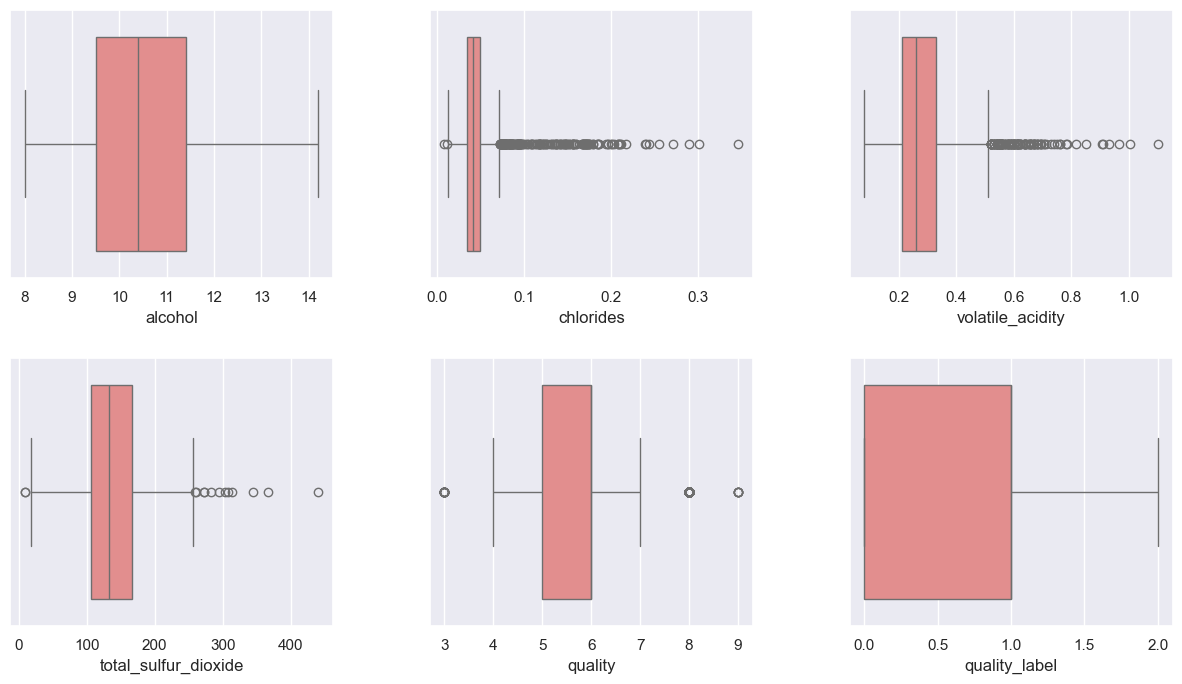

In [24]:
# Create boxplots for each feature

plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(x=df_white_ml[feature], color='lightcoral')

    
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

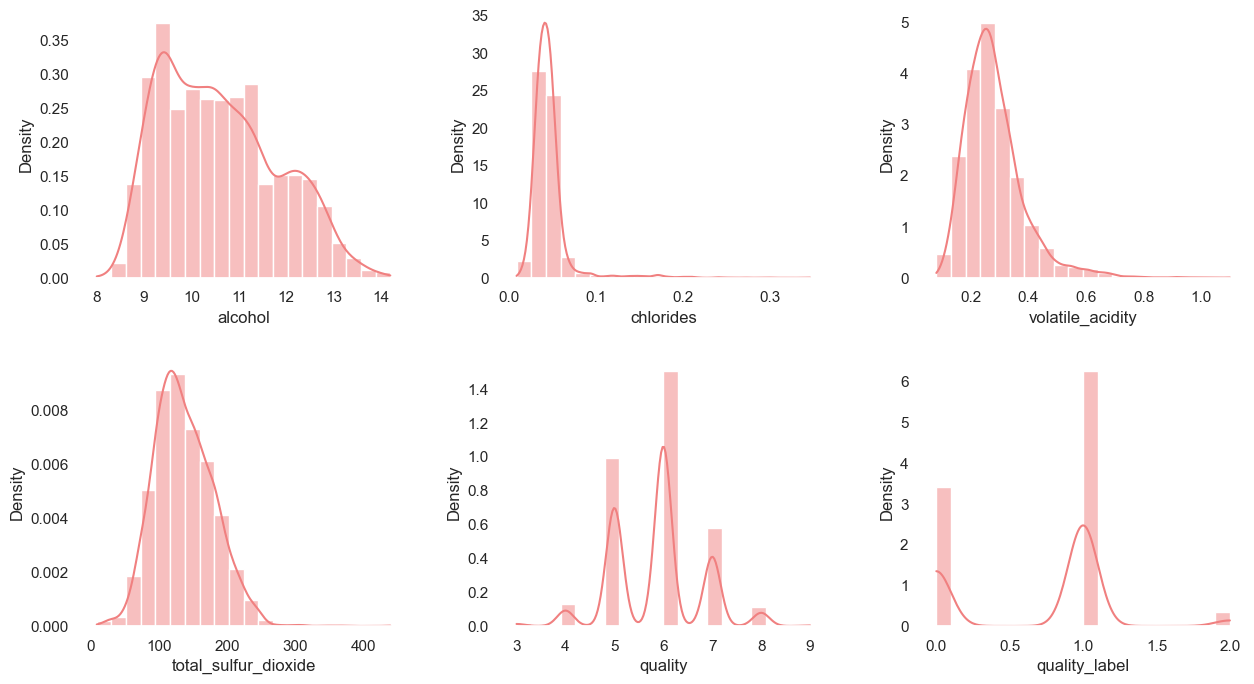

In [25]:
# check data distribution with histograms
 
plt.figure(figsize=(15, 8))

# Create histograms for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_white_ml[feature], kde=True, bins=20, color='lightcoral', stat='density')
    
# Adjust space between plots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Set white background for the figure and axes
plt.gcf().patch.set_facecolor('white')  # Set the background of the figure
for ax in plt.gcf().get_axes():
    ax.set_facecolor('white')  # Set the background for each subplot

plt.show()

* alcohol: No action needed, values seem reasonable, majority of data between 9.5 and 11.4
* chlorides: Strong right skew, Max value of 0.346 is much higher than the 75th percentile, points extreme outliers, also some extreme small values with min 0.009  
* volatile_acidity: Range: 0.08 to 1.1. most values between 0.21 and 0.33. max is notably higher than the 75th percentile
* total_sulfur_dioxide: The max of 440 is too high when i check quantiles, indicates extreme high values, plots also show some concentration on small values. 

### chloride outliers

In [26]:
df_white_ml['chlorides'].describe()

count    3961.000000
mean        0.045905
std         0.023103
min         0.009000
25%         0.035000
50%         0.042000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

In [27]:
df_white_ml['chlorides'].quantile(0.95)

0.069

In [28]:
df_white_ml['chlorides'].quantile(0.05)

0.027

In [29]:
df_filtered = df_white_ml[(df_white_ml['chlorides'] > 0.069) | (df_white_ml['chlorides'] < 0.027)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 18 to 3960
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               384 non-null    float64
 1   chlorides             384 non-null    float64
 2   volatile_acidity      384 non-null    float64
 3   total_sulfur_dioxide  384 non-null    float64
 4   quality               384 non-null    int64  
 5   quality_label         384 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 21.0 KB


In [30]:
df_filtered.head(50).T

,18,30,34,35,47,53,92,104,105,110,166,167,168,188,203,212,267,301,312,325,331,359,367,374,379,387,392,398,403,405,412,414,416,423,429,440,446,461,503,517,518,523,554,572,576,585,609,615,618,622
alcohol,9.300,12.80,9.400,9.400,9.100,8.600,8.800,9.800,11.000,10.60,9.10,9.100,9.100,9.100,11.400,9.800,9.100,9.600,10.800,10.800,12.200,9.200,12.900,9.10,12.900,8.900,12.500,9.200,9.600,9.700,11.400,12.500,12.500,8.80,11.200,9.200,9.300,11.300,9.40,9.000,9.000,9.100,9.200,9.40,9.00,11.100,12.40,9.400,11.100,10.800
chlorides,0.074,0.08,0.172,0.173,0.147,0.092,0.082,0.092,0.026,0.02,0.20,0.197,0.197,0.070,0.026,0.074,0.132,0.071,0.089,0.026,0.021,0.108,0.026,0.07,0.022,0.081,0.023,0.073,0.346,0.025,0.022,0.025,0.026,0.09,0.025,0.114,0.186,0.026,0.18,0.084,0.083,0.096,0.094,0.24,0.29,0.022,0.02,0.185,0.022,0.021
volatile_acidity,0.670,0.28,0.230,0.240,0.200,0.220,0.170,0.130,0.190,0.26,0.29,0.300,0.290,0.685,0.210,0.260,0.280,0.335,0.180,0.170,0.240,0.550,0.250,0.60,0.230,0.210,0.240,0.550,0.370,0.160,0.190,0.440,0.230,0.51,0.360,0.320,0.180,0.250,0.30,0.460,0.260,0.560,0.570,0.27,0.67,0.190,0.33,0.330,0.280,0.210
total_sulfur_dioxide,168.000,123.00,158.000,157.000,132.000,123.000,163.000,158.000,143.000,57.00,181.00,180.000,183.000,172.000,100.000,197.000,127.000,128.000,143.000,115.000,69.000,151.000,126.000,174.00,82.000,126.000,86.000,165.000,200.000,117.000,158.000,173.000,147.000,135.00,55.000,140.000,150.000,93.000,160.00,222.000,171.000,177.000,188.000,174.00,193.00,94.000,89.00,188.000,49.000,142.000
quality,5.000,5.00,6.000,6.000,6.000,6.000,6.000,6.000,6.000,5.00,5.00,6.000,5.000,6.000,7.000,3.000,6.000,6.000,6.000,7.000,6.000,4.000,8.000,5.00,7.000,5.000,6.000,6.000,5.000,6.000,6.000,6.000,6.000,5.00,6.000,6.000,5.000,7.000,6.00,5.000,5.000,4.000,4.000,5.00,4.00,6.000,8.00,5.000,7.000,7.000
quality_label,0.000,0.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.00,0.00,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000,2.000,0.00,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,0.00,1.000,1.000,0.000,1.000,1.00,0.000,0.000,0.000,0.000,0.00,0.00,1.000,2.00,0.000,1.000,1.000


In [31]:
df_filtered['quality'].value_counts()

quality
6    165
5    120
7     63
8     16
4     15
3      3
9      2
Name: count, dtype: int64

In [32]:
df_filtered[df_filtered['quality'] == 9]


,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality,quality_label
688,12.4,0.021,0.36,85.0,9,2
732,12.7,0.018,0.36,119.0,9,2


In [33]:
df_filtered.sort_values(by='chlorides', ascending=True)

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality,quality_label
3066,13.5,0.009,0.61,100.0,5,0
2174,11.7,0.012,0.28,100.0,7,1
3159,13.5,0.013,0.65,10.0,4,0
3064,12.0,0.014,0.27,143.0,4,0
2967,12.5,0.014,0.29,89.0,7,1
...,...,...,...,...,...,...
1570,10.2,0.255,0.36,142.0,6,1
3594,9.8,0.271,0.36,140.0,5,0
576,9.0,0.290,0.67,193.0,4,0
1028,9.2,0.301,0.61,220.0,5,0


* 5th percentile includes 2 of 5 high ranking as 9, there is a considerable negative correlation between chlorides and quality which makes sense 
* instead of 5th percentile 0.027, I will define the minimum value as 0.018 to keep the 2 white wines with quality value 9.  

In [34]:
df_filtered = df_white_ml[(df_white_ml['chlorides'] > 0.069) | (df_white_ml['chlorides'] < 0.018)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 18 to 3935
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               209 non-null    float64
 1   chlorides             209 non-null    float64
 2   volatile_acidity      209 non-null    float64
 3   total_sulfur_dioxide  209 non-null    float64
 4   quality               209 non-null    int64  
 5   quality_label         209 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 11.4 KB


In [35]:
df_filtered['quality'].mean()

5.454545454545454

In [36]:
df_white_ml['quality'].mean()

5.854834637717748

In [37]:
df_white_ml['chlorides'].describe()

count    3961.000000
mean        0.045905
std         0.023103
min         0.009000
25%         0.035000
50%         0.042000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

* 209 of 3961 samples in data set(around 4%) will be removed. The quality distribution is fairly balanced, with an average quality 5.45, slightly lower than the overall average for all white wines 5.85. 

In [38]:
df_white_ml = df_white_ml[(df_white_ml['chlorides'] <= 0.069) & (df_white_ml['chlorides'] >= 0.018)].reset_index(drop=True)
df_white_ml.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               3752 non-null   float64
 1   chlorides             3752 non-null   float64
 2   volatile_acidity      3752 non-null   float64
 3   total_sulfur_dioxide  3752 non-null   float64
 4   quality               3752 non-null   int64  
 5   quality_label         3752 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 176.0 KB


In [39]:
df_white_ml['chlorides'].describe()

count    3752.000000
mean        0.042098
std         0.009695
min         0.018000
25%         0.035000
50%         0.042000
75%         0.049000
max         0.069000
Name: chlorides, dtype: float64

In [40]:
df_white_ml['chlorides'].skew()

0.15328670967948368

In [41]:
df_white_ml['chlorides'].kurtosis()

-0.2768626683841058

In [42]:
df_white_ml['quality'].mean()

5.877132196162047

* The mean decreased slightly from 0.045 to 0.042
* Standard deviation was reduced significantly from 0.023 to 0.009
* The kurtosis dropped to a slight negative value (-0.27), now indicating a more uniform, platykurtic distribution with no extreme tails.
* Skewness reduced to 0.15, which is close to a normal distribution.

## volatile_acidity outliers

* volatile acidity is caused by bacterial spoilage, producing acetic acid, which can lead to serious faults in the wine. 
* Legal limits for volatile acidity reach up to 1.2 g/L in white wines. source: https://enology.umn.edu/news/volatile-acidity-wine-making 

In [43]:
df_white_ml['volatile_acidity'].describe()

count    3752.000000
mean        0.277849
std         0.101043
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.100000
Name: volatile_acidity, dtype: float64

In [44]:
df_white_ml['volatile_acidity'].quantile(0.95)

0.46

In [45]:
df_white_ml['volatile_acidity'].quantile(0.05)

0.15

In [46]:
df_filtered = df_white_ml[(df_white_ml['volatile_acidity'] > 0.46) | (df_white_ml['volatile_acidity'] < 0.15)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 12 to 3737
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               312 non-null    float64
 1   chlorides             312 non-null    float64
 2   volatile_acidity      312 non-null    float64
 3   total_sulfur_dioxide  312 non-null    float64
 4   quality               312 non-null    int64  
 5   quality_label         312 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 17.1 KB


In [47]:
df_filtered.head(50).T

,12,13,25,27,48,62,80,83,89,91,117,137,143,153,161,167,171,178,182,186,206,212,213,214,215,217,235,250,257,258,280,285,300,314,326,327,351,369,380,403,412,422,447,474,502,514,529,566,606,607
alcohol,9.600,12.800,10.200,9.000,10.500,9.00,9.400,9.200,9.700,11.800,9.000,11.400,8.70,12.700,9.60,10.20,9.700,10.400,8.900,9.600,10.200,9.700,9.700,9.700,9.700,9.000,8.500,12.500,10.100,10.300,9.600,11.400,10.000,10.200,9.400,10.300,9.300,9.400,9.200,12.000,10.80,9.700,9.100,10.800,10.800,9.000,10.000,9.200,9.800,9.800
chlorides,0.046,0.029,0.042,0.045,0.035,0.06,0.054,0.051,0.065,0.035,0.058,0.037,0.06,0.034,0.05,0.04,0.051,0.046,0.062,0.044,0.048,0.043,0.044,0.045,0.044,0.057,0.066,0.032,0.040,0.041,0.050,0.044,0.048,0.031,0.049,0.044,0.048,0.039,0.043,0.039,0.05,0.048,0.066,0.030,0.027,0.050,0.047,0.044,0.051,0.047
volatile_acidity,0.480,0.660,0.140,0.120,0.470,0.54,0.120,0.130,0.485,0.140,0.595,0.480,0.67,0.530,0.54,0.57,0.130,0.495,0.640,0.520,0.115,0.580,0.585,0.590,0.600,0.580,0.590,0.550,0.125,0.100,0.145,0.120,0.905,0.550,0.490,0.140,0.520,0.140,0.470,0.620,0.13,0.100,0.510,0.475,0.140,0.105,0.140,0.470,0.140,0.130
total_sulfur_dioxide,99.000,75.000,47.000,117.000,151.000,105.00,162.000,109.000,103.000,85.000,97.000,100.000,108.00,109.000,236.00,77.00,122.000,140.000,142.000,221.000,108.000,149.000,145.000,147.000,147.000,123.000,182.000,164.000,69.000,65.000,131.000,146.000,204.000,125.000,125.000,116.000,245.000,141.000,172.000,152.000,78.00,103.000,165.000,131.000,140.000,146.000,173.000,98.000,136.000,134.000
quality,6.000,8.000,6.000,6.000,5.000,5.00,5.000,6.000,4.000,6.000,4.000,4.000,4.00,8.000,5.00,5.00,6.000,6.000,4.000,6.000,6.000,5.000,6.000,6.000,5.000,5.000,3.000,8.000,6.000,7.000,6.000,7.000,5.000,6.000,5.000,6.000,6.000,6.000,5.000,6.000,6.00,6.000,5.000,5.000,6.000,6.000,6.000,5.000,7.000,7.000
quality_label,1.000,2.000,1.000,1.000,0.000,0.00,0.000,1.000,0.000,1.000,0.000,0.000,0.00,2.000,0.00,0.00,1.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,2.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.00,1.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000


In [48]:
df_filtered['quality'].mean()

5.727564102564102

In [49]:
df_white_ml['quality'].mean()

5.877132196162047

In [50]:
df_white_ml['quality'].value_counts()

quality
6    1707
5    1076
7     678
4     140
8     128
3      18
9       5
Name: count, dtype: int64

In [51]:
df_filtered['quality'].value_counts()

quality
6    120
5     84
7     57
4     35
8     12
3      4
Name: count, dtype: int64

* 312 of 3752 samples have volatile acidity values are not between 5th and the 95th percentile. 
* The average quality of these samples is 5.72 which is close to current average 5.87.
* I will remove the rows that fall outside these percentiles to create a more refined and balanced dataset for the ML model. 

In [52]:
df_white_ml = df_white_ml[(df_white_ml['volatile_acidity'] <= 0.46) & (df_white_ml['volatile_acidity'] >= 0.15)].reset_index(drop=True)
df_white_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440 entries, 0 to 3439
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               3440 non-null   float64
 1   chlorides             3440 non-null   float64
 2   volatile_acidity      3440 non-null   float64
 3   total_sulfur_dioxide  3440 non-null   float64
 4   quality               3440 non-null   int64  
 5   quality_label         3440 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 161.4 KB


In [53]:
df_white_ml['volatile_acidity'].describe()

count    3440.000000
mean        0.269286
std         0.071567
min         0.150000
25%         0.210000
50%         0.260000
75%         0.320000
max         0.460000
Name: volatile_acidity, dtype: float64

In [54]:
df_white_ml['volatile_acidity'].skew()

0.5126691426818939

In [55]:
df_white_ml['volatile_acidity'].kurtosis()

-0.28823615133752956

* the volatile_acidity feature is now more normally distributed

## total_sulfur_dioxide outliers

In [56]:
df_white_ml['total_sulfur_dioxide'].describe()

count    3440.000000
mean      137.827616
std        42.615286
min        18.000000
25%       107.000000
50%       133.000000
75%       167.000000
max       440.000000
Name: total_sulfur_dioxide, dtype: float64

In [57]:
df_white_ml['total_sulfur_dioxide'].quantile(0.95)

212.0

In [58]:
df_white_ml['total_sulfur_dioxide'].quantile(0.05)

74.0

In [59]:
df_filtered = df_white_ml[(df_white_ml['chlorides'] > 0.069) | (df_white_ml['chlorides'] < 0.027)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 87 to 3439
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               163 non-null    float64
 1   chlorides             163 non-null    float64
 2   volatile_acidity      163 non-null    float64
 3   total_sulfur_dioxide  163 non-null    float64
 4   quality               163 non-null    int64  
 5   quality_label         163 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 8.9 KB


In [60]:
df_filtered = df_white_ml[(df_white_ml['total_sulfur_dioxide'] > 212) | (df_white_ml['total_sulfur_dioxide'] < 74)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 6 to 3429
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               333 non-null    float64
 1   chlorides             333 non-null    float64
 2   volatile_acidity      333 non-null    float64
 3   total_sulfur_dioxide  333 non-null    float64
 4   quality               333 non-null    int64  
 5   quality_label         333 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 18.2 KB


In [61]:
df_filtered['quality'].value_counts()

quality
6    151
5    125
7     26
4     23
3      5
8      3
Name: count, dtype: int64

In [62]:
df_filtered[df_filtered['quality'] == 3]

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality,quality_label
316,11.5,0.038,0.32,66.0,3,0
543,12.6,0.022,0.39,19.0,3,0
634,9.6,0.037,0.17,33.0,3,0
1223,9.4,0.041,0.25,216.0,3,0
3327,10.5,0.047,0.26,440.0,3,0


In [63]:
df_white_ml['quality'].value_counts()

quality
6    1587
5     992
7     621
8     116
4     105
3      14
9       5
Name: count, dtype: int64

In [64]:
df_white_ml[df_white_ml['quality'] == 3]

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality,quality_label
180,11.7,0.029,0.240,109.0,3,0
316,11.5,0.038,0.320,66.0,3,0
543,12.6,0.022,0.390,19.0,3,0
634,9.6,0.037,0.170,33.0,3,0
893,12.4,0.033,0.330,96.0,3,0
1072,9.1,0.053,0.320,134.0,3,0
1223,9.4,0.041,0.250,216.0,3,0
1473,9.7,0.034,0.230,123.0,3,0
2184,10.1,0.041,0.200,201.0,3,0
2313,8.0,0.041,0.215,157.0,3,0


In [65]:
df_white_ml[df_white_ml['quality'] == 4]

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality,quality_label
32,9.80,0.063,0.450,206.0,4,0
72,10.10,0.038,0.360,83.0,4,0
129,12.60,0.044,0.320,65.0,4,0
140,8.90,0.047,0.280,210.0,4,0
148,10.20,0.053,0.280,114.0,4,0
...,...,...,...,...,...,...
3136,9.55,0.058,0.280,108.0,4,0
3153,11.50,0.034,0.260,129.0,4,0
3349,11.20,0.045,0.240,132.0,4,0
3366,12.10,0.033,0.350,65.0,4,0


In [66]:
df_filtered['quality'].mean()

5.5375375375375375

* I hesitated to remove these outliers because 5 out of 14 entries had a quality value of 3, and approximately 25% of the entries had a quality value of 4.
* However, the distribution of the quality values is quite inconsistent, so I will proceed by removing values outside the 5th and 95th percentiles.

In [67]:
df_white_ml = df_white_ml[(df_white_ml['total_sulfur_dioxide'] <= 212) & (df_white_ml['total_sulfur_dioxide'] >= 74)].reset_index(drop=True)
df_white_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               3107 non-null   float64
 1   chlorides             3107 non-null   float64
 2   volatile_acidity      3107 non-null   float64
 3   total_sulfur_dioxide  3107 non-null   float64
 4   quality               3107 non-null   int64  
 5   quality_label         3107 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 145.8 KB


In [68]:
df_white_ml.head()

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality,quality_label
0,8.8,0.045,0.27,170.0,6,1
1,9.5,0.049,0.30,132.0,6,1
2,10.1,0.050,0.28,97.0,6,1
3,9.9,0.058,0.23,186.0,6,1
4,9.6,0.045,0.32,136.0,6,1


In [69]:
df_white_ml.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,3107.0,10.661725,1.197871,8.000,9.700,10.500,11.500,14.200
chlorides,3107.0,0.042132,0.009676,0.018,0.035,0.042,0.049,0.069
volatile_acidity,3107.0,0.268225,0.071239,0.150,0.210,0.260,0.310,0.460
total_sulfur_dioxide,3107.0,136.794979,34.163052,74.000,110.000,133.000,163.000,212.000
quality,3107.0,5.928548,0.870223,3.000,5.000,6.000,6.000,9.000
quality_label,3107.0,0.729643,0.522790,0.000,0.000,1.000,1.000,2.000


In [70]:
df_white_ml['total_sulfur_dioxide'].skew()

0.2497089004877891

In [71]:
df_white_ml['total_sulfur_dioxide'].kurtosis()

-0.8551844931716293

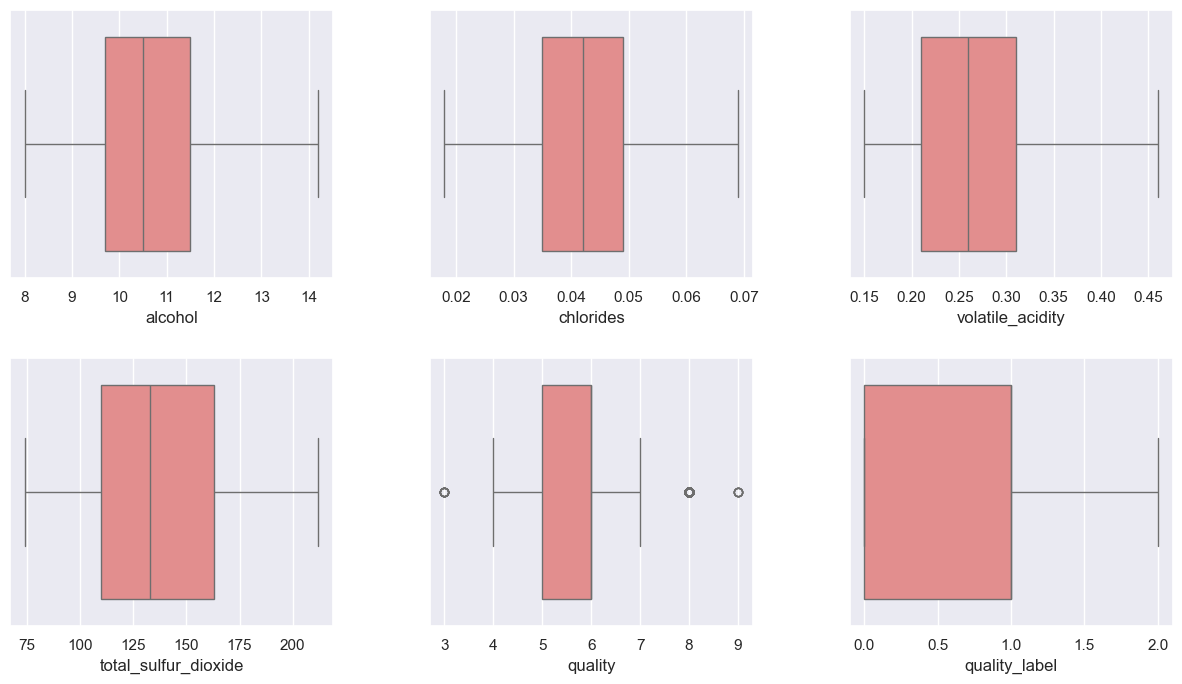

In [72]:
# Create boxplots for each feature

plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # 1 row, 5 columns, plot by index
    sns.boxplot(x=df_white_ml[feature], color='lightcoral')

    
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

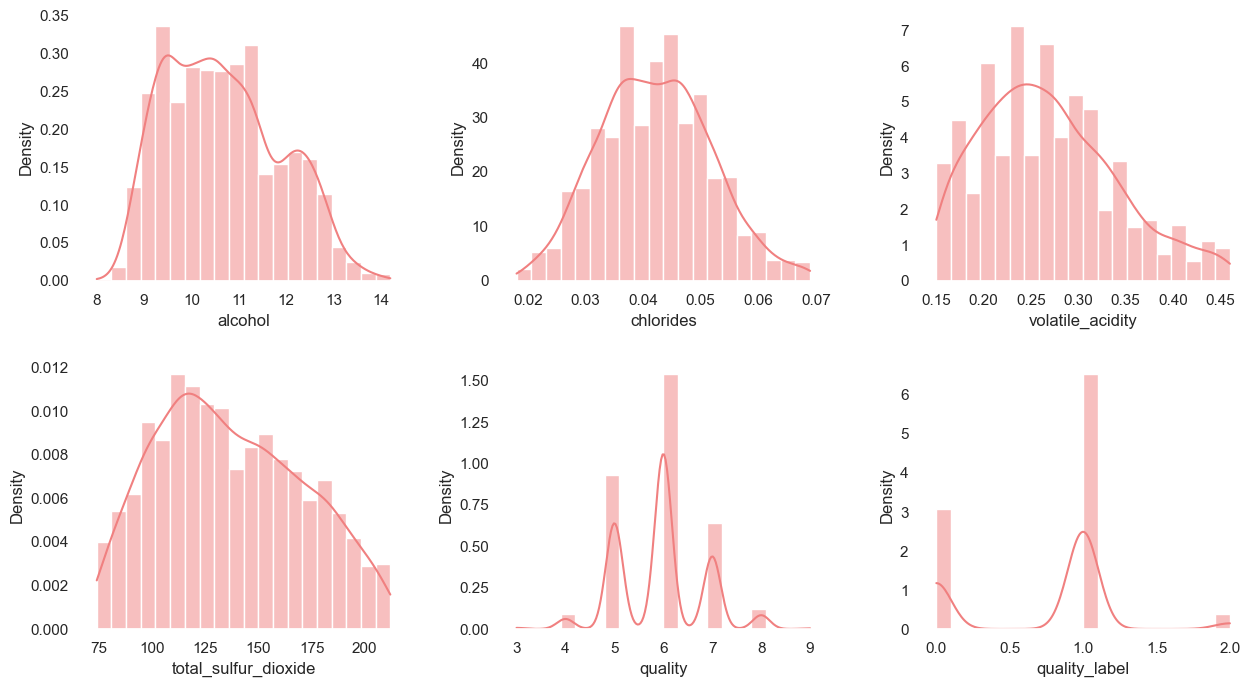

In [73]:
plt.figure(figsize=(15, 8))

# Create histograms for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_white_ml[feature], kde=True, bins=20, color='lightcoral', stat='density')
    
# Adjust space between plots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Set white background for the figure and axes
plt.gcf().patch.set_facecolor('white')  # Set the background of the figure
for ax in plt.gcf().get_axes():
    ax.set_facecolor('white')  # Set the background for each subplot

plt.show()

* A total of 854 out of 3,961 entries were removed, which is approximately 21.6% of all entries. This was done to create a more refined and balanced dataset for the ML model, reducing the influence of extreme outliers.
* 21% of all entries being removed is much more than I expected, especially considering my intention to retain as many samples as possible, anyway it is the final features and entries to train and test, I will try same models with outliers to compare how different models result with and without outliers

# 3: Feature Verification and Hypothesis Testing<a id="3"></a>

* Multicollinearity, data distribution and outliers have already been reviewed on previous steps. Now, I am jumping to ANOVA Tests to confirm if these features have a statistically significant effect on wine quality before proceeding with scaling and training the data.

### Anova Test

In [74]:
# Apply ANOVA for each feature
anova_results = {}
for feature in ['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide']:
    groups = [df_white_ml[df_white_ml['quality_label'] == label][feature] for label in df_white_ml['quality_label'].unique()]
    anova_results[feature] = f_oneway(*groups)

for feature, result in anova_results.items():
    print(f"{feature}: F-statistic = {result.statistic:.3f}, p-value = {result.pvalue:.3f}")


alcohol: F-statistic = 362.805, p-value = 0.000
chlorides: F-statistic = 143.852, p-value = 0.000
volatile_acidity: F-statistic = 37.373, p-value = 0.000
total_sulfur_dioxide: F-statistic = 76.701, p-value = 0.000


All four features have significant F-statistics and p-values, confirming features can be used in model training.

# 4: Scaling & Train-Test Split<a id="4"></a>

In [75]:
df_white_ml

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality,quality_label
0,8.8,0.045,0.27,170.0,6,1
1,9.5,0.049,0.30,132.0,6,1
2,10.1,0.050,0.28,97.0,6,1
3,9.9,0.058,0.23,186.0,6,1
4,9.6,0.045,0.32,136.0,6,1
...,...,...,...,...,...,...
3102,11.2,0.039,0.21,92.0,6,1
3103,9.6,0.047,0.32,168.0,5,0
3104,9.4,0.041,0.24,111.0,6,1
3105,12.8,0.022,0.29,110.0,7,1


In [76]:
df_white_ml['quality_label'].value_counts()

quality_label
1    2031
0     958
2     118
Name: count, dtype: int64

### Feature Scaling

In [77]:
# Select the features (exclude 'quality_label')
X = df_white_ml[['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide']]

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features for scaling
scaled_features = scaler.fit_transform(X)

# Convert the scaled features back into a DataFrame for convenience (optional)
scaled_df = pd.DataFrame(scaled_features, columns=['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide'])

scaled_df


,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide
0,-1.554445,0.296443,0.024920,0.972114
1,-0.969981,0.709886,0.446103,-0.140378
2,-0.469012,0.813246,0.165315,-1.165042
3,-0.636002,1.640132,-0.536657,1.440531
4,-0.886486,0.296443,0.726892,-0.023274
...,...,...,...,...
3102,0.449432,-0.323722,-0.817445,-1.311422
3103,-0.886486,0.503164,0.726892,0.913561
3104,-1.053476,-0.117000,-0.396262,-0.755176
3105,1.785350,-2.080854,0.305709,-0.784453


### Train-Test Split

In [78]:
# Define the features (X) and target (y)
X = df_white_ml[['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide']]
y = df_white_ml['quality_label']

# Perform the train-test split with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5: Model 1: Logistic Regression<a id="5"></a>

In [79]:
# Step 1: Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Step 2: Fit the model on the training data
log_reg.fit(X_train, y_train)

# Step 3: Predict on the test data
y_pred = log_reg.predict(X_test)

# Step 4: Evaluate the model
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.7090032154340836

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.47      0.53       187
           1       0.74      0.86      0.80       410
           2       0.00      0.00      0.00        25

    accuracy                           0.71       622
   macro avg       0.45      0.44      0.44       622
weighted avg       0.67      0.71      0.68       622


Confusion Matrix:
[[ 88  99   0]
 [ 57 353   0]
 [  1  24   0]]


c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Accuracy: approximately 71% of the predictions made by the Logistic Regression model are correct.

* Classification Report
    * low quality: Precision: 0.60 / Recall: 0.47(correctly identified 47% of the actual low-quality wines) / F1-score: 0.53(balance between precision and recall for category is moderate)
    * Medium quality: Precision: 0.74 / Recall: 0.86 which is great / F1-score: 0.80 is a strong score
    * High quality: model completely fails to predict high-quality wines, likely to be due to lack of data for this category.

* Confusion Matrix: 
    * Low quality: 88 correct / 99 incorrect. Model did not predict any wines as high-quality
    * medium quality: 353 correct / 99 incorrect. It did not misclassify any medium-quality wines as high-quality
    * High Quality: Complete failure

In [80]:
# create an empty DataFrame to store results

results = pd.DataFrame(columns=['model', 'accuracy', 'outliers', 'precision_low_q', 'recall_low_q', 'f1_low_q',
                               'precision_medium_q', 'recall_medium_q', 'f1_medium_q', 'precision_high_q', 'recall_high_q', 'f1_high_q']).copy()


results

,model,accuracy,outliers,precision_low_q,recall_low_q,f1_low_q,precision_medium_q,recall_medium_q,f1_medium_q,precision_high_q,recall_high_q,f1_high_q


In [81]:
results = pd.concat([results, pd.DataFrame({
    'model': ['Logistic Regression'],
    'accuracy': [0.709],
    'outliers': ['No'], 
    'precision_low_q': [0.60],
    'recall_low_q': [0.47],
    'f1_low_q': [0.53],
    'precision_medium_q': [0.74],
    'recall_medium_q': [0.86],
    'f1_medium_q': [0.80],
    'precision_high_q': [0.00],
    'recall_high_q': [0.00],
    'f1_high_q': [0.00]
})], ignore_index=True)

results

,model,accuracy,outliers,precision_low_q,recall_low_q,f1_low_q,precision_medium_q,recall_medium_q,f1_medium_q,precision_high_q,recall_high_q,f1_high_q
0,Logistic Regression,0.709,No,0.6,0.47,0.53,0.74,0.86,0.8,0.0,0.0,0.0


*  It performed fairly well, but only for medium-quality wines, with high recall (0.86) and f1-score (0.80). 
*  It struggled with low-quality wines, where both precision (0.60) and recall (0.47) were lower
*  It completely failed to classify high-quality wines (precision, recall, f1-score all zero).

### Now lets see the results for the same model with outliers.

In [82]:
# Create a new df with outliers

features = ['alcohol', 'chlorides', 'volatile_acidity',  'total_sulfur_dioxide', 'quality_label']

df_ml_outliers = df_white[features].reset_index(drop=True)

df_ml_outliers.tail()

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality_label
3956,11.2,0.039,0.21,92.0,1
3957,9.6,0.047,0.32,168.0,0
3958,9.4,0.041,0.24,111.0,1
3959,12.8,0.022,0.29,110.0,1
3960,11.8,0.020,0.21,98.0,1


### Feature Scaling

In [83]:
# Select the features (exclude 'quality_label' as it's the target)
X = df_ml_outliers[['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide']]

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features for scaling
scaled_features = scaler.fit_transform(X)

# Convert the scaled features back into a DataFrame for convenience (optional)
scaled_df = pd.DataFrame(scaled_features, columns=['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide'])

scaled_df

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide
0,-1.470396,-0.039181,-0.101889,0.760754
1,-0.895174,0.133981,0.188179,-0.120433
2,-0.402127,0.177271,-0.005199,-0.932053
3,-0.566476,0.523594,-0.488646,1.131781
4,-0.813000,-0.039181,0.381558,-0.027677
...,...,...,...,...
3956,0.501792,-0.298924,-0.682025,-1.047999
3957,-0.813000,0.047400,0.381558,0.714376
3958,-0.977349,-0.212343,-0.391957,-0.607405
3959,1.816584,-1.034861,0.091490,-0.630594


### Train Test Split

In [84]:
# Define the features (X) and target (y)
X = df_ml_outliers[['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide']]
y = df_ml_outliers['quality_label']

# Perform the train-test split with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Step 1: Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Step 2: Fit the model on the training data
log_reg.fit(X_train, y_train)

# Step 3: Predict on the test data
y_pred = log_reg.predict(X_test)

# Step 4: Evaluate the model
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.691046658259773

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.49      0.55       269
           1       0.72      0.84      0.77       494
           2       0.00      0.00      0.00        30

    accuracy                           0.69       793
   macro avg       0.45      0.44      0.44       793
weighted avg       0.66      0.69      0.67       793


Confusion Matrix:
[[133 136   0]
 [ 79 415   0]
 [  2  28   0]]


c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
results = pd.concat([results, pd.DataFrame({
    'model': ['Logistic Regression'],
    'accuracy': [0.691],
    'outliers': ['Yes'], 
    'precision_low_q': [0.62],
    'recall_low_q': [0.49],
    'f1_low_q': [0.55],
    'precision_medium_q': [0.72],
    'recall_medium_q': [0.84],
    'f1_medium_q': [0.77],
    'precision_high_q': [0.00],
    'recall_high_q': [0.00],
    'f1_high_q': [0.00]
})], ignore_index=True)

results

,model,accuracy,outliers,precision_low_q,recall_low_q,f1_low_q,precision_medium_q,recall_medium_q,f1_medium_q,precision_high_q,recall_high_q,f1_high_q
0,Logistic Regression,0.709,No,0.60,0.47,0.53,0.74,0.86,0.80,0.0,0.0,0.0
1,Logistic Regression,0.691,Yes,0.62,0.49,0.55,0.72,0.84,0.77,0.0,0.0,0.0


* generally results are a bit better without outliers
* only interesting thing to me is precision and recall got slightly better scores for low-quality wines with outliers

# 6: Model 2: k-Nearest Neighbors<a id="6"></a>

In [87]:
# Define the features (X) and target (y)
X = df_white_ml[['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide']]
y = df_white_ml['quality_label']

# Perform the train-test split with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Step 1: Initialize the k-NN model
# You can adjust n_neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Step 2: Fit the model on the training data
knn.fit(X_train, y_train)

# Step 3: Predict on the test data
y_pred_knn = knn.predict(X_test)

# Step 4: Evaluate the model
# Accuracy Score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of k-NN:", accuracy_knn)

# Classification Report
print("\nClassification Report for k-NN:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
print("\nConfusion Matrix for k-NN:")
print(confusion_matrix(y_test, y_pred_knn))


Accuracy of k-NN: 0.6720257234726688

Classification Report for k-NN:
              precision    recall  f1-score   support

           0       0.52      0.47      0.50       187
           1       0.73      0.80      0.76       410
           2       0.00      0.00      0.00        25

    accuracy                           0.67       622
   macro avg       0.42      0.43      0.42       622
weighted avg       0.64      0.67      0.65       622


Confusion Matrix for k-NN:
[[ 88  99   0]
 [ 80 330   0]
 [  0  25   0]]


c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
# add results to table

results = pd.concat([results, pd.DataFrame({
    'model': ['k-Nearest Neighbors'],
    'accuracy': [0.67],
    'outliers': ['No'], 
    'precision_low_q': [0.52],
    'recall_low_q': [0.47],
    'f1_low_q': [0.50],
    'precision_medium_q': [0.73],
    'recall_medium_q': [0.80],
    'f1_medium_q': [0.76],
    'precision_high_q': [0.00],
    'recall_high_q': [0.00],
    'f1_high_q': [0.00]
})], ignore_index=True)

results

,model,accuracy,outliers,precision_low_q,recall_low_q,f1_low_q,precision_medium_q,recall_medium_q,f1_medium_q,precision_high_q,recall_high_q,f1_high_q
0,Logistic Regression,0.709,No,0.60,0.47,0.53,0.74,0.86,0.80,0.0,0.0,0.0
1,Logistic Regression,0.691,Yes,0.62,0.49,0.55,0.72,0.84,0.77,0.0,0.0,0.0
2,k-Nearest Neighbors,0.670,No,0.52,0.47,0.50,0.73,0.80,0.76,0.0,0.0,0.0


* k-NN is performing slightly worse compared to Logistic Regression

### check the results with outliers for kNN

In [90]:
# Define the features (X) and target (y)
X = df_ml_outliers[['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide']]
y = df_ml_outliers['quality_label']

# Perform the train-test split with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Step 1: Initialize the k-NN model
# You can adjust n_neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Step 2: Fit the model on the training data
knn.fit(X_train, y_train)

# Step 3: Predict on the test data
y_pred_knn = knn.predict(X_test)

# Step 4: Evaluate the model
# Accuracy Score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of k-NN:", accuracy_knn)

# Classification Report
print("\nClassification Report for k-NN:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
print("\nConfusion Matrix for k-NN:")
print(confusion_matrix(y_test, y_pred_knn))

Accuracy of k-NN: 0.6229508196721312

Classification Report for k-NN:
              precision    recall  f1-score   support

           0       0.49      0.45      0.47       269
           1       0.68      0.76      0.72       494
           2       0.00      0.00      0.00        30

    accuracy                           0.62       793
   macro avg       0.39      0.40      0.40       793
weighted avg       0.59      0.62      0.61       793


Confusion Matrix for k-NN:
[[120 149   0]
 [120 374   0]
 [  3  27   0]]


c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
# Add  to the table

results = pd.concat([results, pd.DataFrame({
    'model': ['k-Nearest Neighbors'],
    'accuracy': [0.6230],
    'outliers': ['Yes'], 
    'precision_low_q': [0.49],
    'recall_low_q': [0.45],
    'f1_low_q': [0.47],
    'precision_medium_q': [0.68],
    'recall_medium_q': [0.76],
    'f1_medium_q': [0.72],
    'precision_high_q': [0.00],
    'recall_high_q': [0.00],
    'f1_high_q': [0.00]
})], ignore_index=True)

results

,model,accuracy,outliers,precision_low_q,recall_low_q,f1_low_q,precision_medium_q,recall_medium_q,f1_medium_q,precision_high_q,recall_high_q,f1_high_q
0,Logistic Regression,0.709,No,0.60,0.47,0.53,0.74,0.86,0.80,0.0,0.0,0.0
1,Logistic Regression,0.691,Yes,0.62,0.49,0.55,0.72,0.84,0.77,0.0,0.0,0.0
2,k-Nearest Neighbors,0.670,No,0.52,0.47,0.50,0.73,0.80,0.76,0.0,0.0,0.0
3,k-Nearest Neighbors,0.623,Yes,0.49,0.45,0.47,0.68,0.76,0.72,0.0,0.0,0.0


* outliers effect model negatively as expected for knn model

# 7: Model 3: Decision Trees<a id="7"></a>

In [93]:
# Define the features (X) and target (y)
X = df_white_ml[['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide']]
y = df_white_ml['quality_label']

# Perform the train-test split with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Initialize the decision tree classifier model with max_depth to avoid overfitting
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree:", accuracy_dt)

# Classification Report for Decision Tree
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
print("\nConfusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))

Accuracy of Decision Tree: 0.7057877813504824

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.60      0.47      0.52       187
           1       0.74      0.86      0.79       410
           2       0.00      0.00      0.00        25

    accuracy                           0.71       622
   macro avg       0.45      0.44      0.44       622
weighted avg       0.67      0.71      0.68       622


Confusion Matrix for Decision Tree:
[[ 87 100   0]
 [ 58 352   0]
 [  0  25   0]]


c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
results = pd.concat([results, pd.DataFrame({
    'model': ['Decision Tree'],
    'accuracy': [0.70],
    'outliers': ['No'], 
    'precision_low_q': [0.60],
    'recall_low_q': [0.47],
    'f1_low_q': [0.52],
    'precision_medium_q': [0.74],
    'recall_medium_q': [0.86],
    'f1_medium_q': [0.79],
    'precision_high_q': [0.00],
    'recall_high_q': [0.00],
    'f1_high_q': [0.00]
})], ignore_index=True)

results

,model,accuracy,outliers,precision_low_q,recall_low_q,f1_low_q,precision_medium_q,recall_medium_q,f1_medium_q,precision_high_q,recall_high_q,f1_high_q
0,Logistic Regression,0.709,No,0.60,0.47,0.53,0.74,0.86,0.80,0.0,0.0,0.0
1,Logistic Regression,0.691,Yes,0.62,0.49,0.55,0.72,0.84,0.77,0.0,0.0,0.0
2,k-Nearest Neighbors,0.670,No,0.52,0.47,0.50,0.73,0.80,0.76,0.0,0.0,0.0
3,k-Nearest Neighbors,0.623,Yes,0.49,0.45,0.47,0.68,0.76,0.72,0.0,0.0,0.0
4,Decision Tree,0.700,No,0.60,0.47,0.52,0.74,0.86,0.79,0.0,0.0,0.0


* The Decision Tree model shows slightly lower accuracy (0.6929) compared to the Logistic Regression (0.709), but its performance is more balanced across the low and medium quality classes, with higher recall and precision for medium quality wines.
* predicting high quality wines issue is ongoing with this model too 

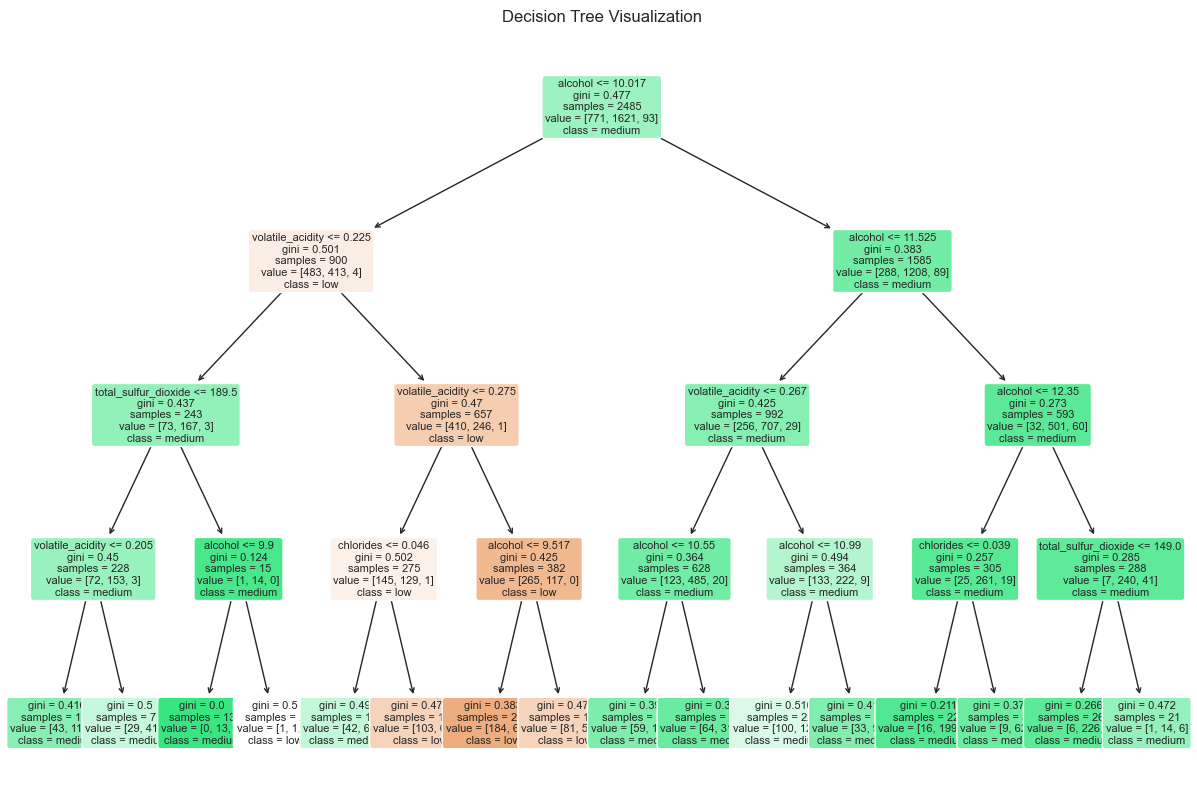

In [96]:
# Convert feature names to a list
feature_names = X.columns.tolist()

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=feature_names, class_names=['low', 'medium', 'high'], rounded=True, fontsize=8)
plt.title('Decision Tree Visualization')
plt.show()

### Decision Tree Model with outliers

In [97]:
# Define the features (X) and target (y)
X = df_ml_outliers[['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide']]
y = df_ml_outliers['quality_label']

# Perform the train-test split with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Initialize the decision tree classifier model with max_depth to avoid overfitting
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree:", accuracy_dt)

# Classification Report for Decision Tree
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
print("\nConfusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))

Accuracy of Decision Tree: 0.6784363177805801

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.59      0.53      0.56       269
           1       0.72      0.80      0.76       494
           2       0.00      0.00      0.00        30

    accuracy                           0.68       793
   macro avg       0.44      0.44      0.44       793
weighted avg       0.65      0.68      0.66       793


Confusion Matrix for Decision Tree:
[[143 126   0]
 [ 99 395   0]
 [  0  30   0]]


c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


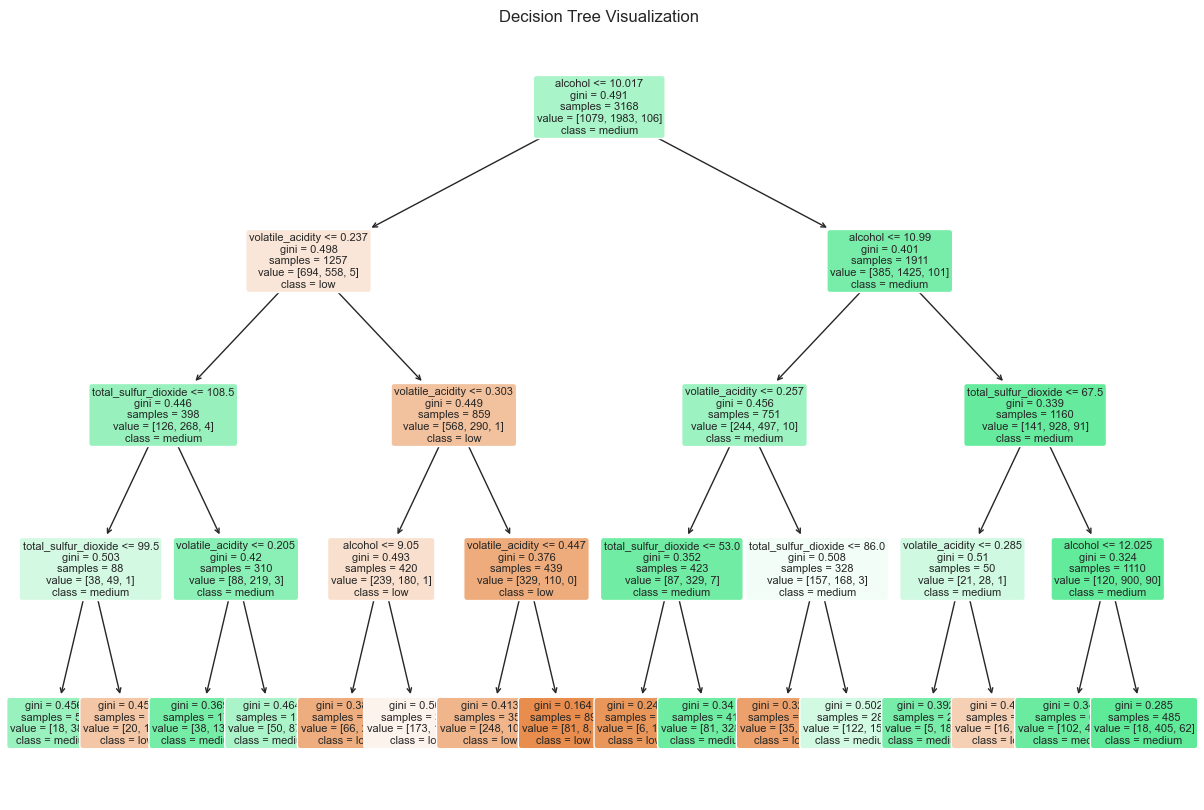

In [99]:
# visualize decision tree (with outliers)

# Convert feature names to a list
feature_names = X.columns.tolist()

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=feature_names, class_names=['low', 'medium', 'high'], rounded=True, fontsize=8)
plt.title('Decision Tree Visualization')
plt.show()



In [100]:
# Add results to table

results = pd.concat([results, pd.DataFrame({
    'model': ['Decision Tree'],
    'accuracy': [0.6784],
    'outliers': ['Yes'], 
    'precision_low_q': [0.59],
    'recall_low_q': [0.53],
    'f1_low_q': [0.56],
    'precision_medium_q': [0.72],
    'recall_medium_q': [0.80],
    'f1_medium_q': [0.76],
    'precision_high_q': [0.00],
    'recall_high_q': [0.00],
    'f1_high_q': [0.00]
})], ignore_index=True)

results


,model,accuracy,outliers,precision_low_q,recall_low_q,f1_low_q,precision_medium_q,recall_medium_q,f1_medium_q,precision_high_q,recall_high_q,f1_high_q
0,Logistic Regression,0.7090,No,0.60,0.47,0.53,0.74,0.86,0.80,0.0,0.0,0.0
1,Logistic Regression,0.6910,Yes,0.62,0.49,0.55,0.72,0.84,0.77,0.0,0.0,0.0
2,k-Nearest Neighbors,0.6700,No,0.52,0.47,0.50,0.73,0.80,0.76,0.0,0.0,0.0
3,k-Nearest Neighbors,0.6230,Yes,0.49,0.45,0.47,0.68,0.76,0.72,0.0,0.0,0.0
4,Decision Tree,0.7000,No,0.60,0.47,0.52,0.74,0.86,0.79,0.0,0.0,0.0
5,Decision Tree,0.6784,Yes,0.59,0.53,0.56,0.72,0.80,0.76,0.0,0.0,0.0


* Model is mainly effected negatively from outliers as all values decrease except recall and f1 scores for low quality wines

# 8: Model 4: Random Forests<a id="8"></a>

In [101]:
# Define the features (X) and target (y)
X = df_white_ml[['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide']]
y = df_white_ml['quality_label']

# Perform the train-test split with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Determine set of hyperparameters

param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Tree depth
    'min_samples_leaf': [1, 5],  # Minimum samples per leaf
    'min_samples_split': [2, 5],  # Minimum samples to split
    'max_features': ['sqrt', 'log2'],  # Features to consider for splits    
}

In [103]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the specified parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model on the training data using GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters from Grid Search:", grid_search.best_params_)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Predict on the test data
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest:", accuracy_rf)

# Classification Report for Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters from Grid Search: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy of Random Forest: 0.7218649517684887

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       187
           1       0.76      0.85      0.80       410
           2       0.00      0.00      0.00        25

    accuracy                           0.72       622
   macro avg       0.46      0.46      0.46       622
weighted avg       0.69      0.72      0.70       622


Confusion Matrix for Random Forest:
[[ 99  88   0]
 [ 60 350   0]
 [  0  25   0]]


c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
#  add  results to the table

results = pd.concat([results, pd.DataFrame({
    'model': ['Random Forest'],
    'accuracy': [0.72],
    'outliers': ['No'],  
    'precision_low_q': [0.62],
    'recall_low_q': [0.53],
    'f1_low_q': [0.57],
    'precision_medium_q': [0.76],
    'recall_medium_q': [0.85],
    'f1_medium_q': [0.80],
    'precision_high_q': [0.00],
    'recall_high_q': [0.00],
    'f1_high_q': [0.00]
})], ignore_index=True)

results

,model,accuracy,outliers,precision_low_q,recall_low_q,f1_low_q,precision_medium_q,recall_medium_q,f1_medium_q,precision_high_q,recall_high_q,f1_high_q
0,Logistic Regression,0.7090,No,0.60,0.47,0.53,0.74,0.86,0.80,0.0,0.0,0.0
1,Logistic Regression,0.6910,Yes,0.62,0.49,0.55,0.72,0.84,0.77,0.0,0.0,0.0
2,k-Nearest Neighbors,0.6700,No,0.52,0.47,0.50,0.73,0.80,0.76,0.0,0.0,0.0
3,k-Nearest Neighbors,0.6230,Yes,0.49,0.45,0.47,0.68,0.76,0.72,0.0,0.0,0.0
4,Decision Tree,0.7000,No,0.60,0.47,0.52,0.74,0.86,0.79,0.0,0.0,0.0
5,Decision Tree,0.6784,Yes,0.59,0.53,0.56,0.72,0.80,0.76,0.0,0.0,0.0
6,Random Forest,0.7200,No,0.62,0.53,0.57,0.76,0.85,0.80,0.0,0.0,0.0


### Random Forest model with outliers 

In [105]:
# Define the features (X) and target (y)
X = df_ml_outliers[['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide']]
y = df_ml_outliers['quality_label']

# Perform the train-test split with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the specified parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model on the training data using GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters from Grid Search:", grid_search.best_params_)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Predict on the test data
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest:", accuracy_rf)

# Classification Report for Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters from Grid Search: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy of Random Forest: 0.694829760403531

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.62      0.55      0.58       269
           1       0.73      0.82      0.77       494
           2       0.00      0.00      0.00        30

    accuracy                           0.69       793
   macro avg       0.45      0.45      0.45       793
weighted avg       0.66      0.69      0.68       793


Confusion Matrix for Random Forest:
[[147 122   0]
 [ 90 404   0]
 [  1  29   0]]


c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
# add results to the table

results = pd.concat([results, pd.DataFrame({
    'model': ['Random Forest'],
    'accuracy': [0.69],
    'outliers': ['Yes'],
    'precision_low_q': [0.62],
    'recall_low_q': [0.55],
    'f1_low_q': [0.58],
    'precision_medium_q': [0.73],
    'recall_medium_q': [0.82],
    'f1_medium_q': [0.77],
    'precision_high_q': [0.00],
    'recall_high_q': [0.00],
    'f1_high_q': [0.00]
})], ignore_index=True)

results

,model,accuracy,outliers,precision_low_q,recall_low_q,f1_low_q,precision_medium_q,recall_medium_q,f1_medium_q,precision_high_q,recall_high_q,f1_high_q
0,Logistic Regression,0.7090,No,0.60,0.47,0.53,0.74,0.86,0.80,0.0,0.0,0.0
1,Logistic Regression,0.6910,Yes,0.62,0.49,0.55,0.72,0.84,0.77,0.0,0.0,0.0
2,k-Nearest Neighbors,0.6700,No,0.52,0.47,0.50,0.73,0.80,0.76,0.0,0.0,0.0
3,k-Nearest Neighbors,0.6230,Yes,0.49,0.45,0.47,0.68,0.76,0.72,0.0,0.0,0.0
4,Decision Tree,0.7000,No,0.60,0.47,0.52,0.74,0.86,0.79,0.0,0.0,0.0
5,Decision Tree,0.6784,Yes,0.59,0.53,0.56,0.72,0.80,0.76,0.0,0.0,0.0
6,Random Forest,0.7200,No,0.62,0.53,0.57,0.76,0.85,0.80,0.0,0.0,0.0
7,Random Forest,0.6900,Yes,0.62,0.55,0.58,0.73,0.82,0.77,0.0,0.0,0.0


# 9: Model 5: Gradient Boosting<a id="9"></a>

In [108]:
# Define the features (X) and target (y)
X = df_white_ml[['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide']]
y = df_white_ml['quality_label']

# Perform the train-test split with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Define the hyperparameters grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],       # Number of trees
    'max_depth': [3, 5, 7],            # Depth of each tree
    'learning_rate': [0.05, 0.1, 0.2], # Learning rate
    'subsample': [0.8, 0.9, 1.0],      # Fraction of data used for each tree (for regularization)
    'min_samples_split': [2, 5],       # Minimum samples required to split a node
    'min_samples_leaf': [1, 5],        # Minimum samples required at each leaf node
}

In [110]:
# Initialize the GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV with the specified parameter grid
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2)

# Fit the model using GridSearchCV to find the best hyperparameters
grid_search_gb.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters from Grid Search:", grid_search_gb.best_params_)

# Get the best model from GridSearchCV
best_gb_model = grid_search_gb.best_estimator_

# Predict on the test data
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nAccuracy of Gradient Boosting:", accuracy_gb)

# Classification Report for Gradient Boosting
print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix for Gradient Boosting
print("\nConfusion Matrix for Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters from Grid Search: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}

Accuracy of Gradient Boosting: 0.7347266881028939

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.65      0.56      0.60       187
           1       0.77      0.86      0.81       410
           2       0.00      0.00      0.00        25

    accuracy                           0.73       622
   macro avg       0.47      0.47      0.47       622
weighted avg       0.70      0.73      0.71       622


Confusion Matrix for Gradient Boosting:
[[105  82   0]
 [ 57 352   1]
 [  0  25   0]]


In [111]:
results = pd.concat([results, pd.DataFrame({
    'model': ['Gradient Boosting'],
    'accuracy': [0.7347],
    'outliers': ['No'],  
    'precision_low_q': [0.65],
    'recall_low_q': [0.56],
    'f1_low_q': [0.60],
    'precision_medium_q': [0.77],
    'recall_medium_q': [0.86],
    'f1_medium_q': [0.81],
    'precision_high_q': [0.00],
    'recall_high_q': [0.00],
    'f1_high_q': [0.00]
})], ignore_index=True)

results

,model,accuracy,outliers,precision_low_q,recall_low_q,f1_low_q,precision_medium_q,recall_medium_q,f1_medium_q,precision_high_q,recall_high_q,f1_high_q
0,Logistic Regression,0.7090,No,0.60,0.47,0.53,0.74,0.86,0.80,0.0,0.0,0.0
1,Logistic Regression,0.6910,Yes,0.62,0.49,0.55,0.72,0.84,0.77,0.0,0.0,0.0
2,k-Nearest Neighbors,0.6700,No,0.52,0.47,0.50,0.73,0.80,0.76,0.0,0.0,0.0
3,k-Nearest Neighbors,0.6230,Yes,0.49,0.45,0.47,0.68,0.76,0.72,0.0,0.0,0.0
4,Decision Tree,0.7000,No,0.60,0.47,0.52,0.74,0.86,0.79,0.0,0.0,0.0
5,Decision Tree,0.6784,Yes,0.59,0.53,0.56,0.72,0.80,0.76,0.0,0.0,0.0
6,Random Forest,0.7200,No,0.62,0.53,0.57,0.76,0.85,0.80,0.0,0.0,0.0
7,Random Forest,0.6900,Yes,0.62,0.55,0.58,0.73,0.82,0.77,0.0,0.0,0.0
8,Gradient Boosting,0.7347,No,0.65,0.56,0.60,0.77,0.86,0.81,0.0,0.0,0.0


### see results with outliers

In [112]:
# Define the features (X) and target (y)
X = df_ml_outliers[['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide']]
y = df_ml_outliers['quality_label']

# Perform the train-test split with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
# Initialize the GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV with the specified parameter grid
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2)

# Fit the model using GridSearchCV to find the best hyperparameters
grid_search_gb.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters from Grid Search:", grid_search_gb.best_params_)

# Get the best model from GridSearchCV
best_gb_model = grid_search_gb.best_estimator_

# Predict on the test data
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nAccuracy of Gradient Boosting:", accuracy_gb)

# Classification Report for Gradient Boosting
print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix for Gradient Boosting
print("\nConfusion Matrix for Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters from Grid Search: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}

Accuracy of Gradient Boosting: 0.694829760403531

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.62      0.55      0.58       269
           1       0.73      0.82      0.77       494
           2       0.00      0.00      0.00        30

    accuracy                           0.69       793
   macro avg       0.45      0.45      0.45       793
weighted avg       0.66      0.69      0.68       793


Confusion Matrix for Gradient Boosting:
[[147 122   0]
 [ 89 404   1]
 [  1  29   0]]


In [114]:
results = pd.concat([results, pd.DataFrame({
    'model': ['Gradient Boosting'],
    'accuracy': [0.69],
    'outliers': ['Yes'],  
    'precision_low_q': [0.62],
    'recall_low_q': [0.55],
    'f1_low_q': [0.58],
    'precision_medium_q': [0.73],
    'recall_medium_q': [0.82],
    'f1_medium_q': [0.77],
    'precision_high_q': [0.00],
    'recall_high_q': [0.00],
    'f1_high_q': [0.00]
})], ignore_index=True)

results

,model,accuracy,outliers,precision_low_q,recall_low_q,f1_low_q,precision_medium_q,recall_medium_q,f1_medium_q,precision_high_q,recall_high_q,f1_high_q
0,Logistic Regression,0.7090,No,0.60,0.47,0.53,0.74,0.86,0.80,0.0,0.0,0.0
1,Logistic Regression,0.6910,Yes,0.62,0.49,0.55,0.72,0.84,0.77,0.0,0.0,0.0
2,k-Nearest Neighbors,0.6700,No,0.52,0.47,0.50,0.73,0.80,0.76,0.0,0.0,0.0
3,k-Nearest Neighbors,0.6230,Yes,0.49,0.45,0.47,0.68,0.76,0.72,0.0,0.0,0.0
4,Decision Tree,0.7000,No,0.60,0.47,0.52,0.74,0.86,0.79,0.0,0.0,0.0
5,Decision Tree,0.6784,Yes,0.59,0.53,0.56,0.72,0.80,0.76,0.0,0.0,0.0
6,Random Forest,0.7200,No,0.62,0.53,0.57,0.76,0.85,0.80,0.0,0.0,0.0
7,Random Forest,0.6900,Yes,0.62,0.55,0.58,0.73,0.82,0.77,0.0,0.0,0.0
8,Gradient Boosting,0.7347,No,0.65,0.56,0.60,0.77,0.86,0.81,0.0,0.0,0.0
9,Gradient Boosting,0.6900,Yes,0.62,0.55,0.58,0.73,0.82,0.77,0.0,0.0,0.0


* Results are slightly worse than the version without outliers. The accuracy dropped from 73.47% to 69.48% . However, this is still a fairly good result

# 10: Model Evaluation and Selection<a id="10"></a>

### Performance

* Logistic Regression is a good baseline but has limitations in classifying high-quality wines. 
* k-NN is the weakest model overall, 
* Decision Tree is better than k-NN
* Random Forest is more robust and offers decent performance
* Gradient Boosting is the most robust model and performs the best

### Outliers

* k-NN has the largest drop in performance with outliers since it relies heavily on the distance between points.
* Random Forest and Gradient Boosting also dropped in accuracy (about 3-4%) with outliers, but not as significantly as k-NN.
* Logistic Regression shows the least drop in accuracy and continues to perform relatively well even with outliers comparing to other models(I would expect Gradient bosstong here) 
* On next step I will focus on the two best-performing models — Random Forest and Gradient Boosting — as they gave us the highest accuracy and performance metrics.

# 11: Hyperparameter Tuning<a id="11"></a>

# 12: Class balancing<a id="12"></a>

# 13: Cross-validation<a id="13"></a>

# 14: Final Results<a id="14"></a>